In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# result_path="/home/emartini/nas/MAEVE/dataset/panoptic-toolbox/results/"
# filenames = [
#             "161029_tools1_V3.csv",
#              "160422_ultimatum1_V3.csv",
#              "170407_haggling_a1_V3.csv",
#              "161029_build1_V3.csv",
#              "170915_office1_V3.csv"
#              ]
# filenames = ['2025_01_31_12_01_170407_haggling_a1_V3.csv']

result_path="tmp/"
filenames = [file for file in os.listdir(result_path) if file.endswith('.csv') and not file.endswith('_debug.csv')]
# print(filenames)
dfs = [pd.read_csv(os.path.join(result_path,filename)) for filename in filenames]
DF = pd.concat(dfs)

cam_grouped = DF[["#Cams","Aggregator","LocA","DetA","AssA","HOTA"]].groupby(["#Cams","Aggregator"]).mean().sort_values(["#Cams","HOTA"]).round(decimals=2)
cam_grouped.to_csv("tmp/grouped_debug.csv")


cam_grouped = DF[["#Cams","#People","Aggregator","HOTA"]].groupby(["#Cams","#People","Aggregator"]).mean().sort_values(["#Cams","Aggregator"]).round(decimals=1)
# cam_grouped.to_csv("tmp/hota_debug.csv")
pivot_df = cam_grouped.pivot_table(
    index=['#People','Aggregator'],   # Righe: combinazione di #Cams e Aggregator
    columns='#Cams',               # Colonne: raggruppate per #People
    values='HOTA'                    # Valori nelle celle: HOTA
)
pivot_df = pivot_df.reset_index()
pivot_df.to_csv("tmp/hota_debug.csv")

cam_grouped = DF[["#Cams","#People","Aggregator","LocA"]].groupby(["#Cams","#People","Aggregator"]).mean().sort_values(["#Cams","Aggregator"]).round(decimals=1)
# cam_grouped.to_csv("tmp/hota_debug.csv")
pivot_df = cam_grouped.pivot_table(
    index=['#People','Aggregator'],   # Righe: combinazione di #Cams e Aggregator
    columns='#Cams',               # Colonne: raggruppate per #People
    values='LocA'                    # Valori nelle celle: HOTA
)
pivot_df = pivot_df.reset_index()
pivot_df.to_csv("tmp/loca_debug.csv")
print(pivot_df)

#Cams  #People  Aggregator     1     2     3     4     5
0            1    baseline  75.6   NaN   NaN   NaN   NaN
1            1      befine  75.6  83.2  86.4  87.8  88.4
2            1      cometh  77.5  81.3  84.8  86.4  87.0
3            1  openptrack  73.3  76.0  76.1  75.5  74.6
4            2    baseline  75.8   NaN   NaN   NaN   NaN
5            2      befine  75.8  82.2  83.5  83.7  83.7
6            2      cometh  77.4  81.3  84.5  86.3  87.3
7            2  openptrack  73.4  75.8  76.8  76.9  76.6
8            3    baseline  76.4   NaN   NaN   NaN   NaN
9            3      befine  76.3  81.7  82.7  82.9  83.6
10           3      cometh  78.0  81.1  84.1  85.6  86.1
11           3  openptrack  75.1  75.9  75.7  75.7  76.2
12           7    baseline  80.2   NaN   NaN   NaN   NaN
13           7      befine  80.2  84.3  85.7  86.1  86.2
14           7      cometh  81.1  84.5  87.2  88.5  89.2
15           7  openptrack  78.1  79.7  80.0  80.0  79.3


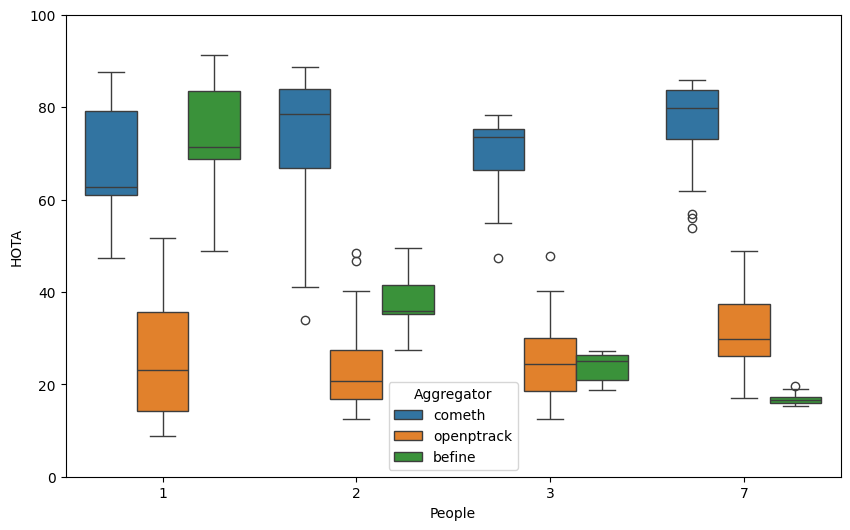

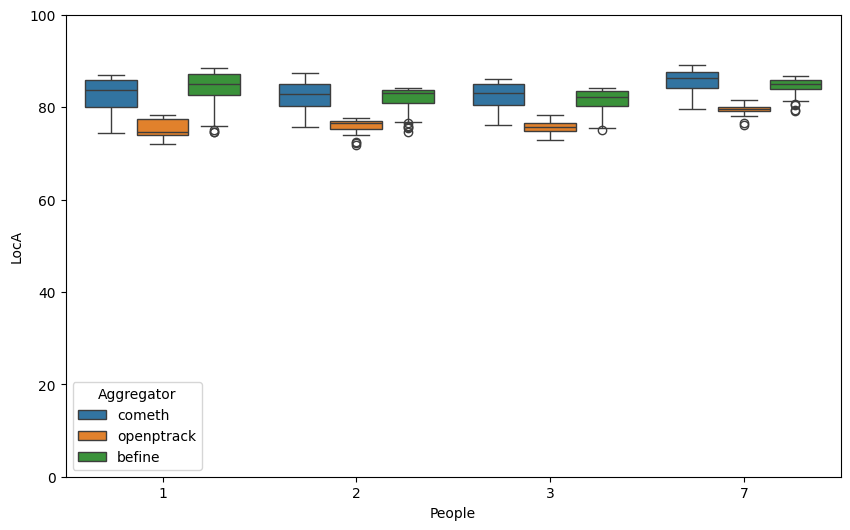

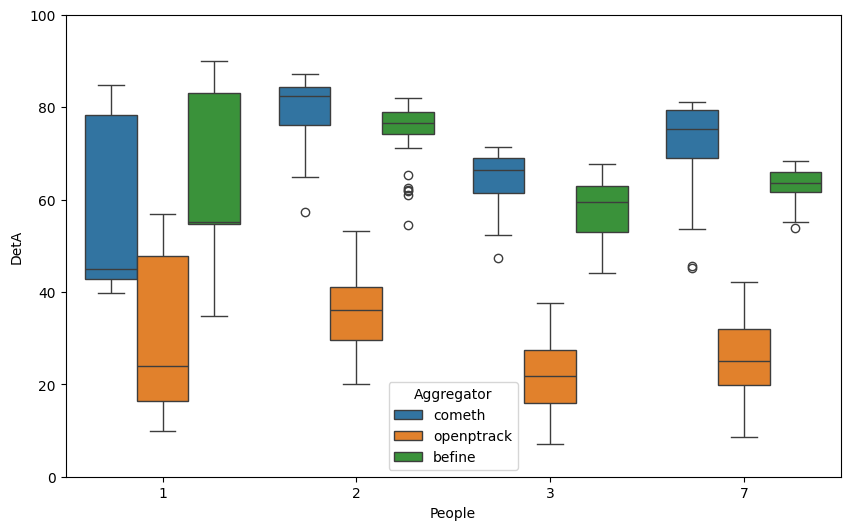

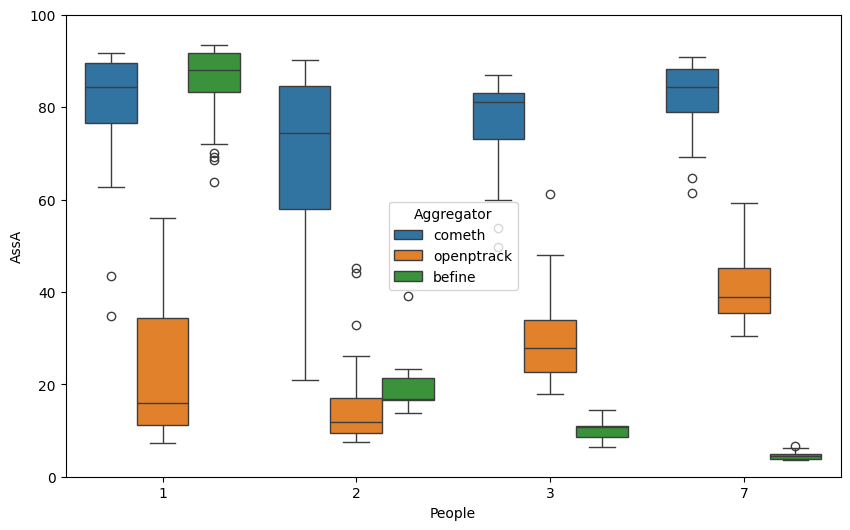

In [40]:

#.unstack().boxplot(column="HOTA",by="Aggregator",title="HOTA",ylim=(0,100))
# cam_grouped["HOTA"].unstack().plot(kind='bar',title="HOTA",ylim=(0,100))
# cam_grouped["DetA"].unstack().plot(kind='bar',title="DetA",ylim=(0,100))
# cam_grouped["AssA"].unstack().plot(kind='bar',title="AssA",ylim=(0,100))
# cam_grouped["LocA"].unstack().plot(kind='bar',title="LocA",ylim=(0,100))
# DF[["Aggregator","#Cams","HOTA"]].groupby(["Aggregator","#Cams"]).min()
DF = DF[DF['Aggregator'] != 'baseline']
methods = ["HOTA","LocA","DetA","AssA"]
for method in methods:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='#People', y=method, hue='Aggregator',  data=DF)
    plt.xlabel('People')
    plt.ylabel(method)
    plt.ylim(0,100)
    plt.show()

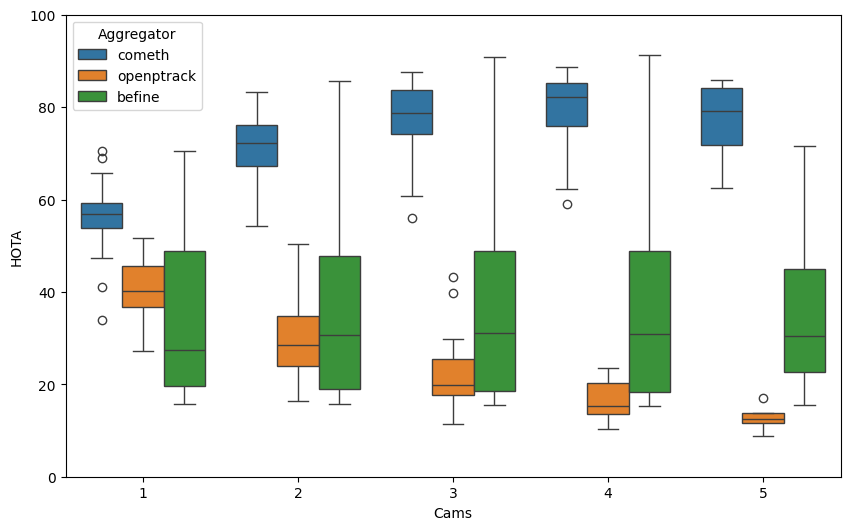

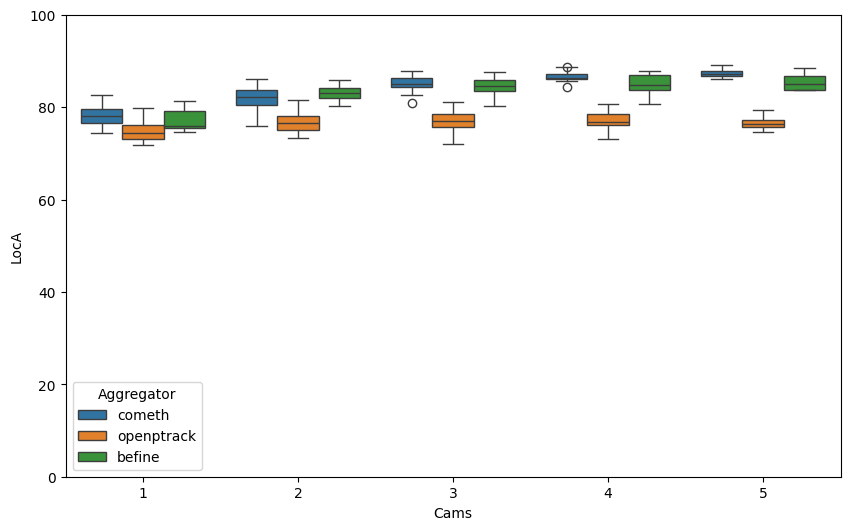

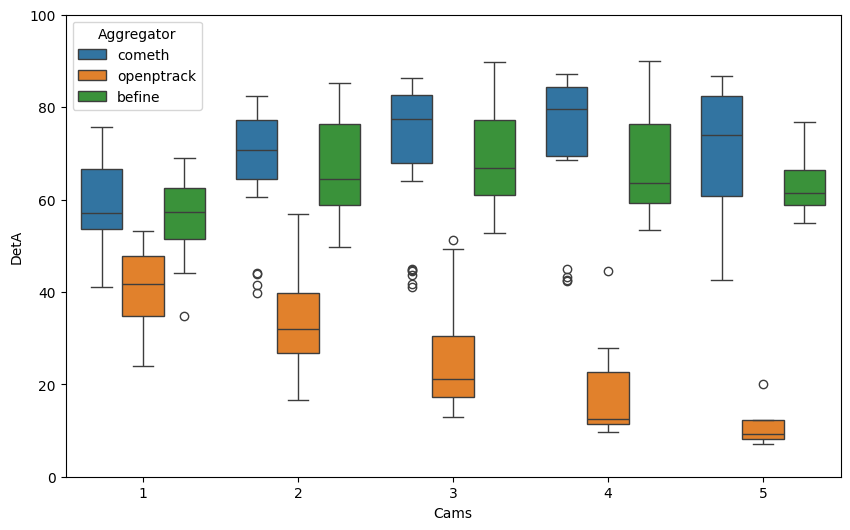

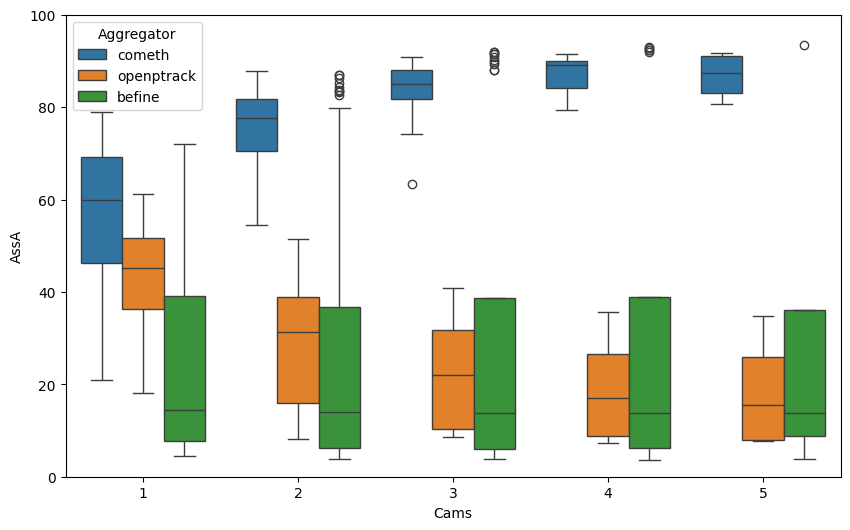

In [37]:
methods = ["HOTA","LocA","DetA","AssA"]
for method in methods:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='#Cams', y=method, hue='Aggregator',  data=DF)
    plt.xlabel('Cams')
    plt.ylabel(method)
    plt.ylim(0,100)
    plt.show()

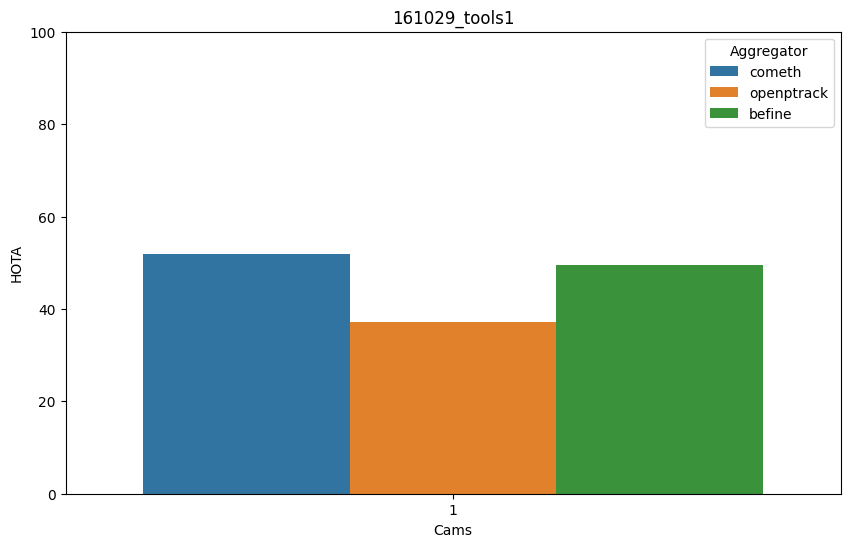

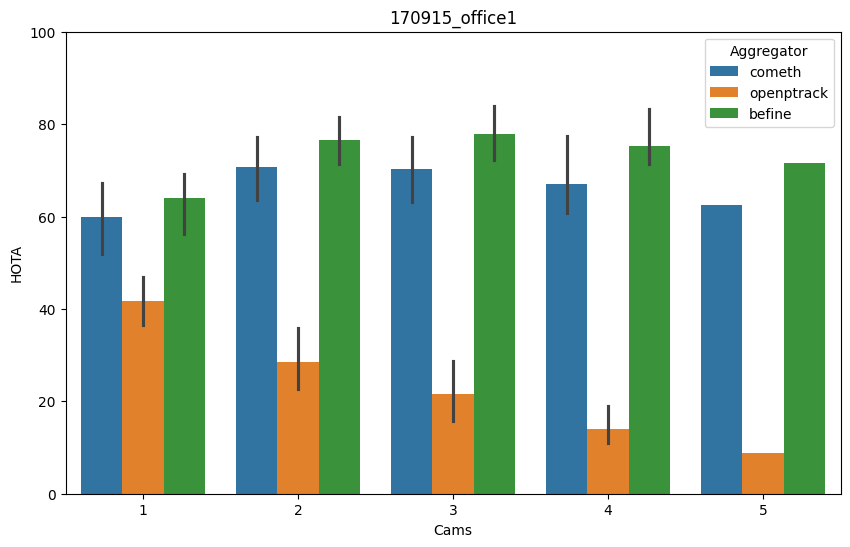

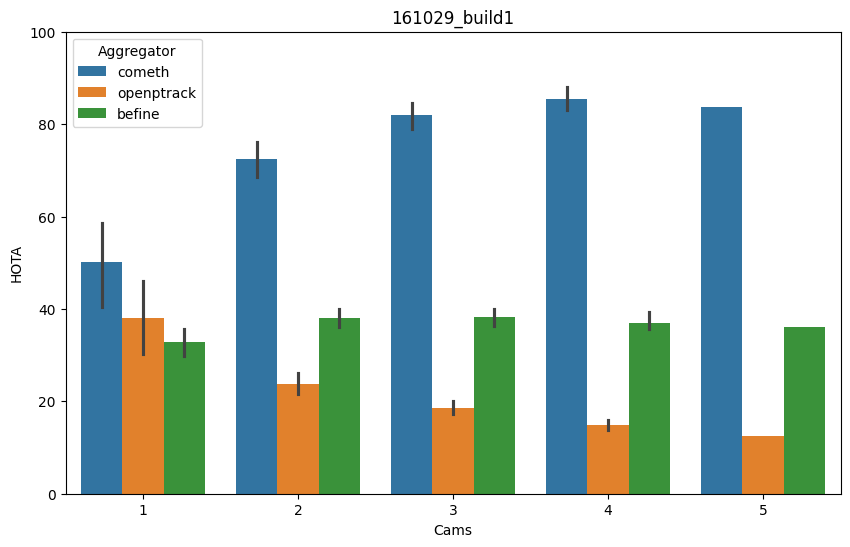

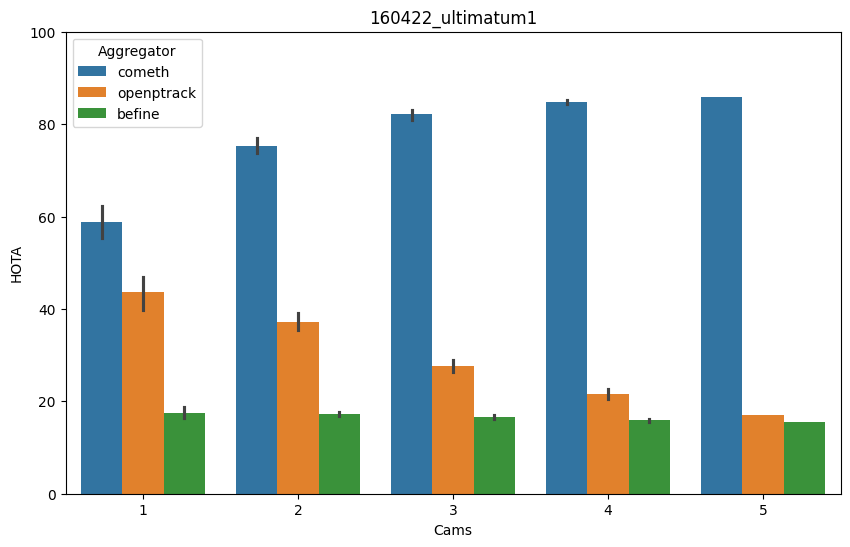

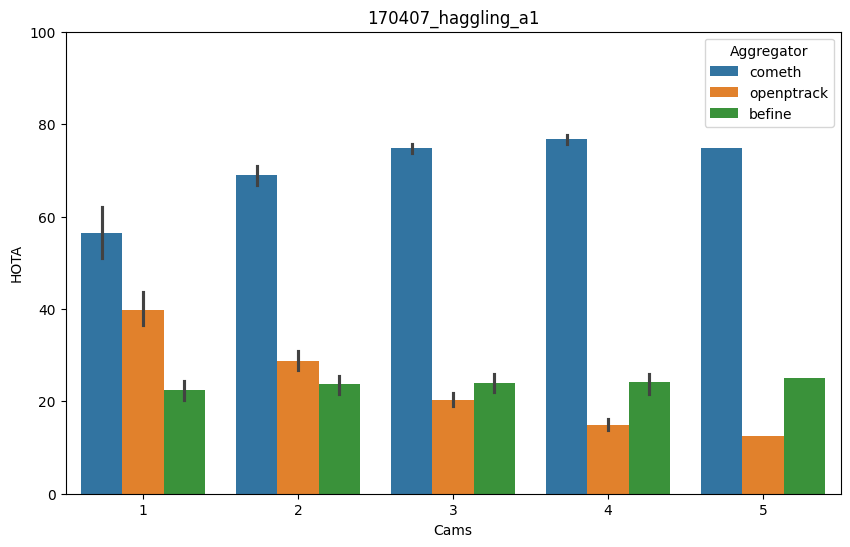

In [38]:
sequences = ["161029_tools1","170915_office1","161029_build1","160422_ultimatum1","170407_haggling_a1",] # "161029_sports1"
for sequence in sequences:
    df = DF.loc[DF["Sequence"] == sequence]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='#Cams', y='HOTA', hue='Aggregator',  data=df)
    plt.xlabel('Cams')
    plt.ylabel('HOTA')
    plt.title(sequence)
    plt.ylim(0,100)
    plt.show()

In [6]:
DFD = pd.read_csv(os.path.join(result_path,"2025_01_31_12_01_170407_haggling_a1_V3_debug.csv"))
DFD[["Aggregator","LocA","AssA","DetA","HOTA","step"]].sort_values(["step","Aggregator"]) #.groupby(["#Cams","Aggregator"]).mean()

,Aggregator,LocA,AssA,DetA,HOTA,step
40,befine,0.795725,0.115434,0.745110,0.293277,0.05
10,cometh,0.835539,0.935565,0.777824,0.853056,0.05
31,openptrack,0.697303,0.254447,0.094855,0.155357,0.05
41,befine,0.799098,0.115140,0.739063,0.291712,0.10
11,cometh,0.835798,0.935283,0.777351,0.852668,0.10
27,openptrack,0.699811,0.254705,0.094437,0.155092,0.10
42,befine,0.802557,0.114896,0.732497,0.290105,0.15
3,cometh,0.836093,0.934486,0.776773,0.851988,0.15
33,openptrack,0.702483,0.254926,0.093954,0.154762,0.15
50,befine,0.806082,0.114568,0.725424,0.288288,0.20
